In [57]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import hvplot.networkx as hvnx
import bokeh
import holoviews as hv
from holoviews import opts
import hvplot.pandas

In [58]:
attr_list = pd.read_csv('data/attr_list_exrx.csv',encoding = 'latin')
edge_list = pd.read_csv('data/edge_list_exrx.csv')

In [59]:
attr_list = attr_list.loc[:,['article_id', 'node_type', 'temporal_seq_rank', 'publication_year']]
edge_list = edge_list.loc[:,['from', 'to']]

In [60]:
attr_list.head(5)

,article_id,node_type,temporal_seq_rank,publication_year
0,1,Systematic Review Report,219.5,2013
1,2,Systematic Review Report,204.0,2013
2,3,Systematic Review Report,215.5,2013
3,4,Systematic Review Report,217.0,2013
4,5,Systematic Review Report,200.0,2014


In [61]:
# convert attr_list into a dictionary
attr_dict_temp = attr_list.to_dict(orient='records')

# shape the dict to fit the input of networx
attr_dict = [(x['article_id'], x) for x in attr_dict_temp]

In [62]:
edge_list.head()

,from,to
0,1,220
1,1,212
2,1,192
3,1,133
4,1,112


In [63]:
# create the color attribute in the network object

node_color = []
node_shape = []

# adding one more item in attr_dict about color of fill and edge
for x in attr_dict:
    if x[1]['node_type'] == 'Systematic Review Report':
        node_color.append('steelblue')
        node_shape.append('square')
    elif x[1]['node_type'] == 'Primary Study Report':
        node_color.append('grey')
        node_shape.append('circle')

In [64]:
seed = 42
G = nx.Graph()
G.add_nodes_from(attr_dict)
G.add_edges_from([(x, y) for x, y in zip(edge_list['from'].to_list(), edge_list['to'].to_list())])
pos = nx.spring_layout(G, seed=seed)

node_type_dict = nx.get_node_attributes(G, name='node_type')

In [65]:
node_shape_dict = {}
node_color_dict = {}
for i in node_type_dict.keys():
    if node_type_dict[i] == 'Systematic Review Report':
        node_shape_dict[i] = 'square'
        node_color_dict[i] = 'steelblue'
    if node_type_dict[i] == 'Primary Study Report':
        node_shape_dict[i] = 'circle'
        node_color_dict[i] = 'grey'

In [66]:

nx.set_node_attributes(G, node_shape_dict, 'node_shape')
nx.set_node_attributes(G, node_color_dict, 'node_color')

# hvnx.draw(G, pos=pos, width=800, height=600, node_color=node_color, node_marker=node_shape, with_labels=True)
vis = hv.Graph.from_networkx(G, positions=pos).opts(node_marker='node_shape', node_color='node_color')
vis.opts(width=900, height=800)

vis.opts(
    opts.Graph(node_size=30))

# create labels
labels = hv.Labels(
    {('x', 'y'): vis.nodes.array([0, 1]), 'text': attr_list['article_id'].to_list()},
    ['x', 'y'], 'text'
)

vis*labels

:Overlay
   .Graph.I  :Graph   [start,end]
   .Labels.I :Labels   [x,y]   (text)

In [67]:
seed = 42
G = nx.DiGraph()
G.add_nodes_from(attr_dict)
G.add_edges_from([(x, y) for x, y in zip(edge_list['from'].to_list(), edge_list['to'].to_list())])

In [68]:
attr_list['inclusion_number'] = [x[1] for x in list(G.in_degree())]

In [69]:
attr_list.head()

,article_id,node_type,temporal_seq_rank,publication_year,inclusion_number
0,1,Systematic Review Report,219.5,2013,0
1,2,Systematic Review Report,204.0,2013,0
2,3,Systematic Review Report,215.5,2013,0
3,4,Systematic Review Report,217.0,2013,0
4,5,Systematic Review Report,200.0,2014,0


In [70]:
attr_list_psr = attr_list.loc[27:, ].copy()
attr_list_psr.head()

,article_id,node_type,temporal_seq_rank,publication_year,inclusion_number
27,31,Primary Study Report,1.0,1979,1
28,32,Primary Study Report,2.0,1979,1
29,33,Primary Study Report,3.0,1979,1
30,34,Primary Study Report,4.0,1979,3
31,35,Primary Study Report,5.0,1981,3


In [71]:
# compute PSR-UR
attr_list_psr.head()

,article_id,node_type,temporal_seq_rank,publication_year,inclusion_number
27,31,Primary Study Report,1.0,1979,1
28,32,Primary Study Report,2.0,1979,1
29,33,Primary Study Report,3.0,1979,1
30,34,Primary Study Report,4.0,1979,3
31,35,Primary Study Report,5.0,1981,3


In [72]:
srr_rank = attr_list.loc[:26, 'temporal_seq_rank'].to_list()

In [73]:
avail_no_of_srr_list = [sum([x < y for y in srr_rank]) for x in attr_list_psr['temporal_seq_rank'].to_list()]
inclusion_number_list = attr_list_psr['inclusion_number'].to_list()
psr_ur_list = [round(x/y,2) for x, y in zip(inclusion_number_list, avail_no_of_srr_list)]
pub_year_list = attr_list_psr['publication_year'].to_list()

In [74]:
attr_list_psr.loc[:, 'PSR-UR'] = psr_ur_list

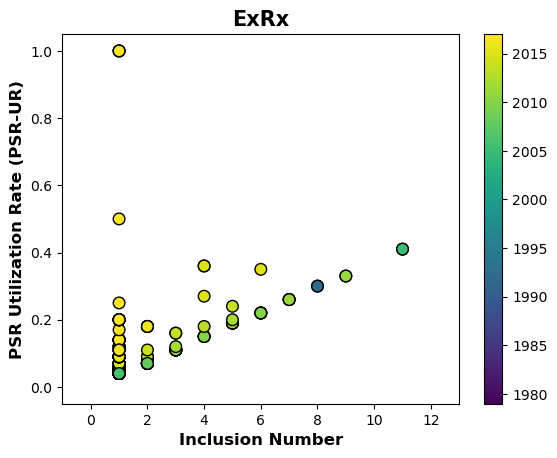

In [86]:
plt.scatter(inclusion_number_list, psr_ur_list, c=pub_year_list, edgecolor='black', s=70)
plt.xlabel("Inclusion Number", fontsize=12,fontweight="bold")
plt.ylabel("PSR Utilization Rate (PSR-UR)", fontsize=12,fontweight="bold")
plt.xlim(-1, 13)
plt.ylim(-0.05, 1.05)
plt.colorbar()
plt.title("ExRx", fontsize=15,fontweight="bold")
plt.show()

In [87]:
plt.scatter(inclusion_number_list, psr_ur_list, c=pub_year_list, edgecolor='black', s=70)
plt.xlabel("Inclusion Number", fontsize=12,fontweight="bold")
plt.ylabel("PSR Utilization Rate (PSR-UR)", fontsize=12,fontweight="bold")
plt.xlim(-1, 13)
plt.ylim(-0.05, 1.05)
plt.colorbar()
plt.title("ExRx", fontsize=15,fontweight="bold")
plt.gcf().set_size_inches(6,5)
plt.savefig("ExRx.png", dpi=300)
plt.close()

In [77]:
attr_list_psr.hvplot.scatter(x='inclusion_number', y='PSR-UR', height=400, width=400)

:Scatter   [inclusion_number]   (PSR-UR)

In [78]:
attr_list_psr.loc[attr_list_psr['PSR-UR'] == 0.41]

,article_id,node_type,temporal_seq_rank,publication_year,inclusion_number,PSR-UR
62,69,Primary Study Report,36.0,1997,11,0.41
101,112,Primary Study Report,74.0,2005,11,0.41
